# Exercise 1
Using your select stock / market index and your decision criterion (binary or ternary) on the daily return of the next day or on the trend (daily return after 5/10 days), can you generate a 1R model using as possible predictor the volume, and the moving average (with a period of 5, 10, 20 50 or 200). You can learn on all days except the last 100 (that will be used as the test set).

In [7]:
import pandas as pd

ibm = pd.read_csv('../Data/IBM.txt.zst', delimiter=' ')
ibm['Date'] = ibm['Date'].apply(pd.to_datetime)
print(ibm.head(5))
ibm.describe(include='all', datetime_is_numeric=True)

        Date       Open        High        Low       Close    Volume  \
0 2007-01-03  97.180000   98.400002  96.260002   97.269997   9196800   
1 2007-01-04  97.250000   98.790001  96.879997   98.309998  10524500   
2 2007-01-05  97.599998   97.949997  96.910004   97.419998   7221300   
3 2007-01-08  98.500000   99.500000  98.349998   98.900002  10340000   
4 2007-01-09  99.080002  100.330002  99.070000  100.070000  11108200   

    Adjusted  
0  63.127567  
1  63.802544  
2  63.224930  
3  64.185463  
4  64.944771  


,Date,Open,High,Low,Close,Volume,Adjusted
count,3692,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000
mean,2014-05-02 11:46:20.931744256,147.198976,148.403180,146.074512,147.269085,5.576247e+06,113.375997
min,2007-01-03 00:00:00,72.739998,76.980003,69.500000,71.739998,1.027500e+06,48.040176
25%,2010-08-31 18:00:00,124.189999,125.349998,123.072502,124.332496,3.482300e+06,90.296511
50%,2014-05-03 12:00:00,144.750000,145.619995,143.830002,144.730003,4.653750e+06,120.980629
75%,2017-12-30 00:00:00,168.847500,170.442501,167.659996,169.169998,6.660725e+06,132.155647
max,2021-08-31 00:00:00,215.380005,215.899994,214.300003,215.800003,3.806350e+07,155.979538
std,NaN,30.808862,30.780935,30.844083,30.796603,3.229710e+06,25.410689


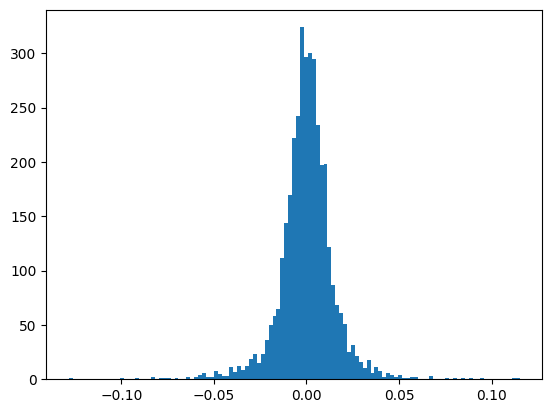

In [8]:
import numpy as np
import matplotlib.pyplot as plt

daily_returns = np.empty(ibm['Close'].shape)
daily_returns[0] = float('NaN')
daily_returns[1:] = np.ediff1d(ibm['Close']) / ibm['Close'][:-1]
ibm.insert(loc=len(ibm.columns), column='Daily Returns', value=daily_returns)

num_bins = int(len(daily_returns) / 32)
plt.hist(daily_returns, bins=num_bins)
plt.show()

In [9]:
binary_decision = (daily_returns > 0).astype(float)
binary_decision[0] = float('NaN')
ibm.insert(loc=len(ibm.columns), column='Binary Decision', value=binary_decision)

CUTOFF = 0.005
ternary_decision = np.zeros(daily_returns.shape)
ternary_decision[np.where(daily_returns > CUTOFF)] = 1
ternary_decision[np.where(daily_returns < CUTOFF)] = -1
ternary_decision[0] = float('NaN')
ibm.insert(loc=len(ibm.columns), column='Ternary Decision', value=ternary_decision)

print(ibm.head(5))

        Date       Open        High        Low       Close    Volume  \
0 2007-01-03  97.180000   98.400002  96.260002   97.269997   9196800   
1 2007-01-04  97.250000   98.790001  96.879997   98.309998  10524500   
2 2007-01-05  97.599998   97.949997  96.910004   97.419998   7221300   
3 2007-01-08  98.500000   99.500000  98.349998   98.900002  10340000   
4 2007-01-09  99.080002  100.330002  99.070000  100.070000  11108200   

    Adjusted  Daily Returns  Binary Decision  Ternary Decision  
0  63.127567            NaN              NaN               NaN  
1  63.802544       0.010692              1.0               1.0  
2  63.224930      -0.009053              0.0              -1.0  
3  64.185463       0.015192              1.0               1.0  
4  64.944771       0.011830              1.0               1.0  


In [10]:
# TODO: go further